In [1]:
import pyspark,pygeohash,ogr

In [2]:
sc = pyspark.SparkContext()

In [3]:
def isPoint(line):
    pntline = line.split(",")
    try:
        wkt = "POINT({0} {1})".format(float(pntline[2]),
                                      float(pntline[3]))
        geom = ogr.CreateGeometryFromWkt(wkt)
        return geom.IsValid()
    except:
        return False

In [4]:
rdd = sc.textFile("./data/eq2013.csv").filter(lambda line: isPoint(line))

In [5]:
rdd.take(5)

['2013/5/31,23:41:56,-113.408,37.175,6.6,2.5,ML2.5,SLC,,UTAH,',
 '2013/5/31,23:09:05,-113.411,37.178,6,2.5,ML2.5,SLC,,UTAH,',
 '2013/5/31,22:45:34,-113.413,37.172,4,2.9,ML2.9,SLC,,UTAH,',
 '2013/5/31,22:34:26,-113.414,37.174,3.2,2.8,ML2.8,SLC,,UTAH,',
 '2013/5/31,22:34:02,-178.08,51.127,26,3.1,ML3.1,AEIC,,ANDREANOF ISLANDS, ALEUTIAN IS.']

## 三级geohash网格，156km * 156km

In [6]:
def mymap(line):
    pnt = line.split(",")
    return (pygeohash.encode(float(pnt[3]),float(pnt[2]),3),1)

In [7]:
r2= rdd.map(lambda row : mymap(row)).reduceByKey(lambda x,y:x+y)

In [8]:
res = r2.collect()

In [9]:
print(res[:50])

[('9qx', 11), ('b11', 91), ('9r1', 60), ('b3v', 10), ('ben', 9), ('rb6', 1), ('m9p', 1), ('rpt', 1), ('2h4', 11), ('d7p', 26), ('bdy', 3), ('9mg', 4), ('9fu', 22), ('9y5', 6), ('9vs', 4), ('bde', 54), ('qye', 17), ('2h0', 10), ('241', 9), ('tjh', 93), ('qzk', 14), ('tk9', 41), ('9y7', 13), ('tw6', 27), ('9q5', 22), ('w8n', 1), ('d7r', 64), ('d3h', 5), ('bev', 2), ('mqp', 3), ('9q4', 7), ('qpq', 2), ('bej', 23), ('qz7', 8), ('8e3', 44), ('w5k', 6), ('d42', 11), ('wsn', 7), ('wej', 5), ('3c8', 6), ('9fc', 24), ('b0f', 4), ('9xc', 9), ('bek', 20), ('tmh', 2), ('9x2', 2), ('67q', 7), ('twd', 9), ('d48', 1), ('gck', 2)]


## 将geohash编码解析回经纬度

In [10]:
import pandas
x = []
y = []
v = []
for r in res:
    xy = pygeohash.decode(r[0])
    x.append(float(xy[1]))
    y.append(float(xy[0]))
    v.append(int(r[1]))
pd = pandas.DataFrame({"x":x,"y":y,"v":v})

In [11]:
pd.head()

,x,y,v
0,-113.0,37.0,11
1,-178.0,51.0,91
2,-122.0,40.0,60
3,-161.0,56.0,10
4,-148.0,63.0,9


In [12]:
import matplotlib.pyplot as plt

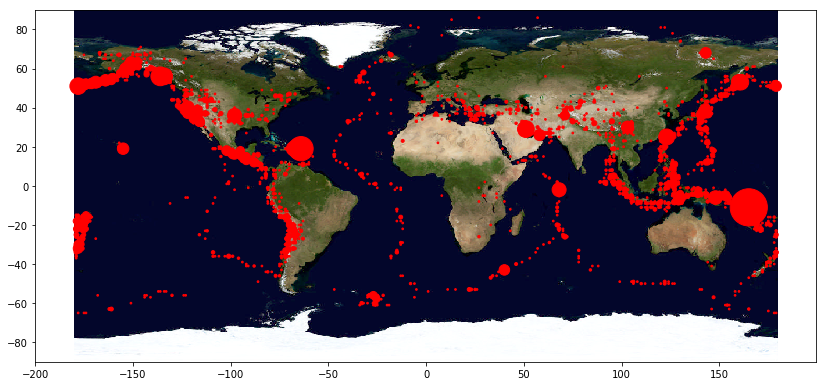

In [16]:
wordmap = plt.imread("./data/world.png")
plt.figure(figsize=(14, 10))
plt.imshow(wordmap, zorder=0, extent=[-179.99,179.999,-89.999,89.9999])
plt.scatter(pd.x,pd.y,marker="o",c="r",s=pd.v*3,alpha = 1)
plt.show()